In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import random

df = pd.read_csv('./Ads_CTR_Optimisation.csv')

In [2]:
def upperConfidenceBound():
    ads = list()
    Ni = np.ones(10)
    Ri = np.zeros(10)

    total = 0

    for a in range(df.index.size):
        max_upper_bound = ad = 0
        
        for b in range(df.columns.size):
            ri = Ri[b] / Ni[b]
            delta_i = np.sqrt(3 / 2 * np.log(a + 1) / Ni[b])
            upper_bound = ri + delta_i
            
            if upper_bound > max_upper_bound:
                max_upper_bound = upper_bound
                ad = b
                
        ads.append(ad)
        Ni[ad] += 1
        reward = df.iloc[a, ad]
        Ri[ad] += reward
        total += reward
        
    return ads

In [3]:
def thompsonSampling():
    ads = list()
    Ni = np.zeros((2, 10))
    Ni0 = np.zeros(10)
    Ni1 = np.zeros(10)
    total = 0
    
    for a in range(df.index.size):
        max_sample = ad = 0
        
        for b in range(df.columns.size):
            random_sample = random.betavariate(Ni[1, b] + 1, Ni[0, b] + 1)
            
            if random_sample > max_sample:
                max_sample = random_sample
                ad = b
        
        ads.append(ad)    
        reward = df.iloc[a, ad]
        Ni[reward, ad] += 1
        total += reward

    return ads

In [4]:
results = pd.DataFrame({'UCB': upperConfidenceBound(), 'Thompson Sampling': thompsonSampling()})

In [5]:
px.histogram(results)

<Axes: ylabel='Count'>

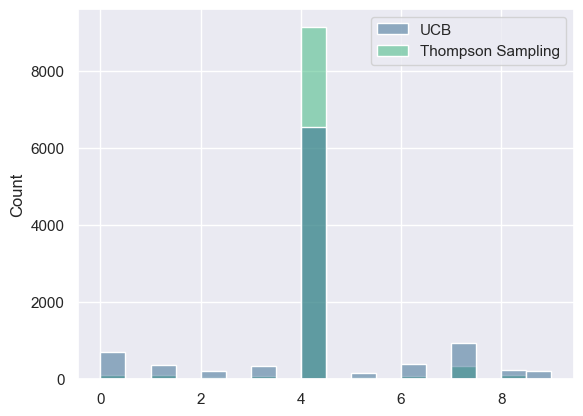

In [7]:
sns.set(style = 'darkgrid')
sns.histplot(results, palette = 'viridis', binwidth = 0.5)